In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading csv into a dataframe
shop_data = pd.read_csv("Downloads\shopping_trends_updated.csv",index_col="Customer ID")

In [3]:
# Printinng the first 5 rows of the dataset
shop_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Number of rows and columns
shop_data.shape

(3900, 17)

In [5]:
# Brief information on dataset columns
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

In [6]:
# Summary numerical info from numerical columns
shop_data.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [7]:
# Searching for duplicates
shop_data[shop_data.duplicated() == True]

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,


In [8]:
# Searching for null and nas
shop_data.isna().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
# Renaming the columns to make querying easier
shop_data.rename(columns = {
    'Age': 'age',
    'Gender': 'gender',
    'Item Purchased': 'item_purchased',
    'Category': 'category',
    'Purchase Amount (USD)': 'purchase_amount',
    'Location': 'location',
    'Size': 'size',
    'Color': 'color',
    'Season': 'season',
    'Review Rating': 'review_rating',
    'Subscription Status': 'subscription_status',
    'Shipping Type': 'shipping_type',
    'Discount Applied': 'discount_applied',
    'Promo Code Used': 'promo_code_used',
    'Previous Purchases': 'previous_purchases',
    'Payment Method': 'payment_method',
    'Frequency of Purchases': 'purchase_frequency'
}, inplace=True)

In [10]:
# Confirming the change
shop_data.head()

,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,purchase_frequency
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Customer Demographics: What is the average age of the customers in the dataset?

In [11]:
shop_data["age"].mean()

44.06846153846154

## Purchase Analysis: What are the unique categories of items purchased, and how many items fall into each category?

In [12]:
shop_data.groupby(["category", "item_purchased"]).size()

category     item_purchased
Accessories  Backpack          143
             Belt              161
             Gloves            140
             Handbag           153
             Hat               154
             Jewelry           171
             Scarf             157
             Sunglasses        161
Clothing     Blouse            171
             Dress             166
             Hoodie            151
             Jeans             124
             Pants             171
             Shirt             169
             Shorts            157
             Skirt             158
             Socks             159
             Sweater           164
             T-shirt           147
Footwear     Boots             144
             Sandals           160
             Shoes             150
             Sneakers          145
Outerwear    Coat              161
             Jacket            163
dtype: int64

## Discount Calculation: For items where a discount is applied ('discount applied' is 'Yes'), what is the discounted amount based on a 10% reduction?


In [13]:
def discount(row):
    if row["discount_applied"] == 'Yes':
        return row["purchase_amount"] * 0.1
    else:
        return 0

shop_data["discount_amount"] = shop_data.apply(discount, axis='columns')

shop_data.head()

,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,purchase_frequency,discount_amount
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,5.3
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,6.4
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,7.3
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,9.0
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,4.9


## Customer Reviews: What is the average customer review rating in the dataset?

In [14]:
shop_data["review_rating"].mean()

3.749948717948712

## Size Distribution: Can you provide a distribution of the sizes of the purchased items (Small, Medium, Large, XL)?


In [15]:
shop_data["size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: size, dtype: int64

## Shipping Preferences: What are the most common shipping types preferred by customers?

In [16]:
shop_data.groupby("shipping_type").size()

shipping_type
2-Day Shipping    627
Express           646
Free Shipping     675
Next Day Air      648
Standard          654
Store Pickup      650
dtype: int64

## High-Value Purchases: Identify items categorized as 'Footwear' with a purchase amount exceeding 50USD.

In [17]:
shop_data[(shop_data['category'] == 'Footwear') & (shop_data['purchase_amount'] > 50)]

,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,purchase_frequency,discount_amount
Customer ID,,,,,,,,,,,,,,,,,,
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,9.0
65,65,Male,Boots,Footwear,83,Alabama,S,Green,Fall,4.8,Yes,Standard,Yes,Yes,18,Debit Card,Fortnightly,8.3
81,19,Male,Sandals,Footwear,72,New York,XL,Blue,Summer,3.3,Yes,Store Pickup,Yes,Yes,24,Credit Card,Every 3 Months,7.2
82,67,Male,Shoes,Footwear,96,Virginia,L,Maroon,Summer,2.6,Yes,Express,Yes,Yes,36,Credit Card,Every 3 Months,9.6
88,52,Male,Shoes,Footwear,53,Ohio,M,Green,Fall,3.7,Yes,2-Day Shipping,Yes,Yes,44,Debit Card,Fortnightly,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836,58,Female,Sandals,Footwear,58,Pennsylvania,L,Silver,Winter,2.6,No,Express,No,No,28,PayPal,Bi-Weekly,0.0
3857,39,Female,Sandals,Footwear,78,Virginia,S,Brown,Summer,2.5,No,Free Shipping,No,No,8,Debit Card,Quarterly,0.0
3877,60,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually,0.0


## Customer Loyalty: Categorize customers into 'Loyal' and 'Regular' based on their number of previous purchases. Assign the value 'Loyal' if the 'previous purchases' are greater than 5, otherwise 'Regular'.

In [18]:
def loyalty(row):
    if row["previous_purchases"] > 5:
        return 'Loyal'
    else:
        return 'Regular'
    
shop_data['loyalty_status'] = shop_data.apply(loyalty, axis='columns')

shop_data.head()

,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,purchase_frequency,discount_amount,loyalty_status
Customer ID,,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,5.3,Loyal
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,6.4,Regular
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,7.3,Loyal
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,9.0,Loyal
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,4.9,Loyal


## Payment Method Analysis: What are the most frequently used payment methods among customers?

In [19]:
shop_data.groupby("payment_method").size()

payment_method
Bank Transfer    612
Cash             670
Credit Card      671
Debit Card       636
PayPal           677
Venmo            634
dtype: int64

## Customer Purchase Patterns: What is the average purchase amount for each category of items?

In [20]:
shop_data.groupby("category")["purchase_amount"].mean()

category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: purchase_amount, dtype: float64

## Can you identify the top three categories with the highest total purchase amounts?

In [21]:
shop_data.groupby("category")["purchase_amount"].sum().sort_values(ascending=False)

category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: purchase_amount, dtype: int64

## Seasonal Analysis: How do the average purchase amounts vary across different seasons?

In [22]:
shop_data.groupby("season")["purchase_amount"].mean()

season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: purchase_amount, dtype: float64

## Are there specific categories that exhibit seasonal trends?

In [23]:
shop_data.groupby(["season", "category"]).size()
# shop_data.groupby(["season", "category"]).size().reset_index(name='count').sort_values('count',ascending=False)

season  category   
Fall    Accessories    324
        Clothing       427
        Footwear       136
        Outerwear       88
Spring  Accessories    301
        Clothing       454
        Footwear       163
        Outerwear       81
Summer  Accessories    312
        Clothing       408
        Footwear       160
        Outerwear       75
Winter  Accessories    303
        Clothing       448
        Footwear       140
        Outerwear       80
dtype: int64

## Geographical Insights: Which locations have the highest average purchase amounts?

In [24]:
shop_data.groupby("location")["purchase_amount"].mean().sort_values(ascending=False).head(10)

location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Washington       63.328767
North Dakota     62.891566
Virginia         62.883117
Utah             62.577465
Michigan         62.095890
Name: purchase_amount, dtype: float64

## Can you identify any regional preferences in terms of item categories?

In [25]:
shop_data.groupby(["location", "category"])["purchase_amount"].agg(["sum", "count"])

sum  count
location  category                
Alabama   Accessories  1576     25
          Clothing     2334     41
          Footwear      914     15
          Outerwear     437      8
Alaska    Accessories  1719     26
...                     ...    ...
Wisconsin Outerwear     120      3
Wyoming   Accessories  1388     23
          Clothing     1850     31
          Footwear      703     11
          Outerwear     368      6

[200 rows x 2 columns]

## Gender-Based Analysis: What is the distribution of item purchases across genders?

In [26]:
shop_data.groupby("gender")["item_purchased"].count()

gender
Female    1248
Male      2652
Name: item_purchased, dtype: int64

## Are there specific categories that one gender tends to prefer over the other?

In [27]:
shop_data.groupby(["category", "gender"])["purchase_amount"].agg(["sum", "count"])

sum  count
category    gender              
Accessories Female  23819    392
            Male    50381    848
Clothing    Female  33636    556
            Male    70628   1181
Footwear    Female  11835    199
            Male    24258    400
Outerwear   Female   5901    101
            Male    12623    223

## Discount Impact: How does the presence of a discount affect the average purchase amount?

In [28]:
shop_data.query('discount_amount > 0')["purchase_amount"].mean()

59.27906976744186

In [29]:
shop_data.query('discount_amount == 0')["purchase_amount"].mean()

60.130454340980656

## Are customers more likely to make high-value purchases when a discount is applied?

In [30]:
shop_data.groupby("discount_applied")["purchase_amount"].mean()

discount_applied
No     60.130454
Yes    59.279070
Name: purchase_amount, dtype: float64

## Customer Loyalty vs. Purchase Frequency: Is there a correlation between the number of previous purchases and the average purchase amount?

In [31]:
shop_data['previous_purchases'].corr(shop_data['purchase_amount'])

0.00806341227058774

## Do loyal customers tend to make purchases more frequently?

In [32]:
shop_data.groupby(["loyalty_status", "purchase_frequency"]).size()

loyalty_status  purchase_frequency
Loyal           Annually              518
                Bi-Weekly             482
                Every 3 Months        518
                Fortnightly           485
                Monthly               495
                Quarterly             503
                Weekly                475
Regular         Annually               54
                Bi-Weekly              65
                Every 3 Months         66
                Fortnightly            57
                Monthly                58
                Quarterly              60
                Weekly                 64
dtype: int64

## Payment Method Preferences: Which payment methods are most commonly used by customers making high-value purchases?

In [33]:
# High-value purchases - purchases higher that $50
shop_data.query('purchase_amount > 50').groupby("payment_method").size().sort_values(ascending=False)

payment_method
Credit Card      416
Debit Card       407
Cash             406
PayPal           403
Bank Transfer    379
Venmo            375
dtype: int64

## Size and Color Preferences: What are the most popular sizes and colors across all purchased items?

In [34]:
shop_data.groupby(["size","color"]).size()

size  color    
L     Beige        30
      Black        53
      Blue         48
      Brown        40
      Charcoal     32
                   ..
XL    Teal         19
      Turquoise    18
      Violet       14
      White        20
      Yellow       22
Length: 100, dtype: int64

## Shipping Type Influence: How does the choice of shipping type relate to the purchase amount?

In [35]:
shop_data.groupby("shipping_type")["purchase_amount"].mean()

shipping_type
2-Day Shipping    60.733652
Express           60.475232
Free Shipping     60.410370
Next Day Air      58.631173
Standard          58.460245
Store Pickup      59.893846
Name: purchase_amount, dtype: float64

## Are customers more likely to choose certain shipping types for specific categories of items?

In [36]:
shop_data.groupby(["category","shipping_type"]).size()

category     shipping_type 
Accessories  2-Day Shipping    206
             Express           203
             Free Shipping     195
             Next Day Air      211
             Standard          208
             Store Pickup      217
Clothing     2-Day Shipping    281
             Express           290
             Free Shipping     294
             Next Day Air      293
             Standard          297
             Store Pickup      282
Footwear     2-Day Shipping     90
             Express            96
             Free Shipping     122
             Next Day Air       93
             Standard          100
             Store Pickup       98
Outerwear    2-Day Shipping     50
             Express            57
             Free Shipping      64
             Next Day Air       51
             Standard           49
             Store Pickup       53
dtype: int64

## Subscription Status and Purchase Frequency: Is there a difference in average purchase amounts between subscribed and non-subscribed customers?

In [37]:
shop_data.groupby("subscription_status")["purchase_amount"].mean()

subscription_status
No     59.865121
Yes    59.491928
Name: purchase_amount, dtype: float64

## Do customers with a subscription tend to make purchases more frequently?

In [38]:
shop_data.groupby(["subscription_status", "purchase_frequency"]).size()

subscription_status  purchase_frequency
No                   Annually              412
                     Bi-Weekly             407
                     Every 3 Months        430
                     Fortnightly           389
                     Monthly               404
                     Quarterly             423
                     Weekly                382
Yes                  Annually              160
                     Bi-Weekly             140
                     Every 3 Months        154
                     Fortnightly           153
                     Monthly               149
                     Quarterly             140
                     Weekly                157
dtype: int64

# Charts and Graphs

## Category Distribution: Visualize the distribution of item categories using a bar chart.

Text(0.5, 1.0, 'Distribution of item categories')

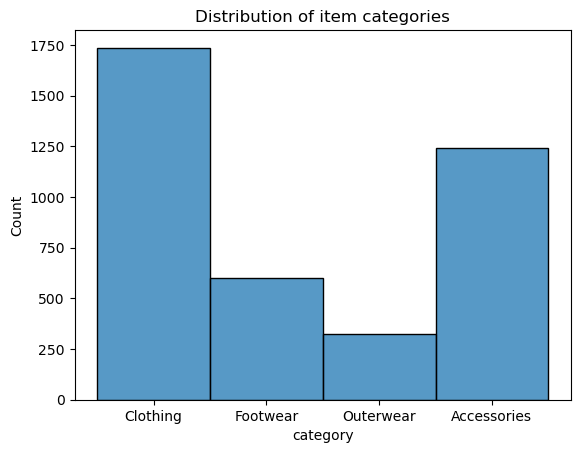

In [39]:
sns.histplot(shop_data["category"])
plt.title("Distribution of item categories")

Text(0.5, 1.0, 'Distribution of item categories by Gender')

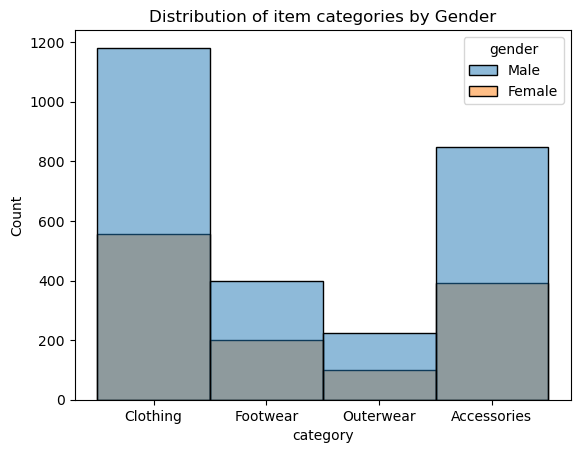

In [40]:
# By gender
sns.histplot(data=shop_data, x="category", hue="gender")
plt.title("Distribution of item categories by Gender")

## Purchase Amount Distribution: Create a histogram to show the distribution of purchase amounts.

Text(0.5, 1.0, 'Histogram of purchase amounts')

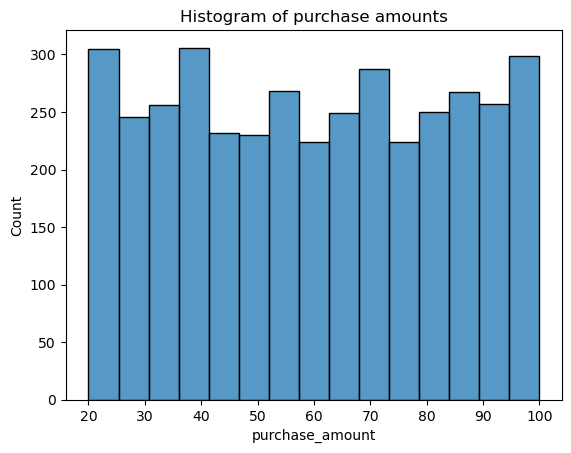

In [41]:
sns.histplot(shop_data["purchase_amount"])
plt.title("Histogram of purchase amounts")

## Average Purchase Amount by Category: Generate a bar chart to display the average purchase amount for each item category.

In [42]:
average_purchase_by_category = shop_data.groupby('category')['purchase_amount'].mean().reset_index()
average_purchase_by_category

,category,purchase_amount
0,Accessories,59.838710
1,Clothing,60.025331
2,Footwear,60.255426
3,Outerwear,57.172840


Text(0.5, 1.0, 'Average Purchase Amount Per Category')

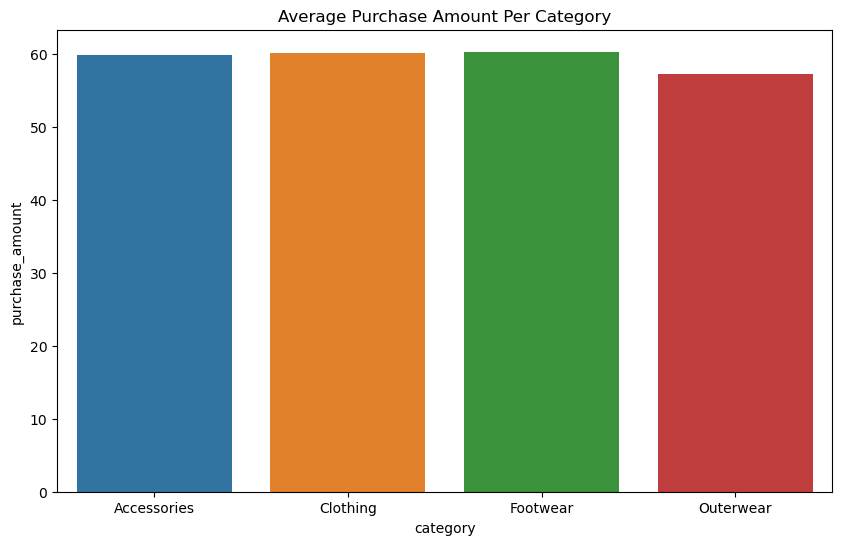

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x="category", y="purchase_amount", data=average_purchase_by_category)
plt.title("Average Purchase Amount Per Category")

## Discount Impact: Compare the average purchase amounts for transactions with and without discounts using a bar chart or boxplot.

Text(0.5, 1.0, 'Average purchase amount With and Without discounts')

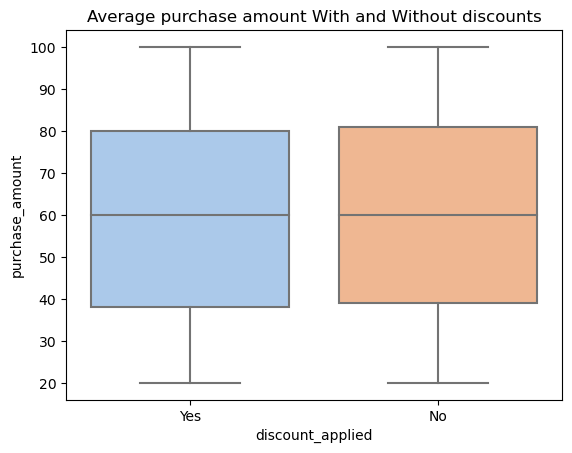

In [44]:
sns.boxplot(x='discount_applied', y='purchase_amount', data=shop_data, palette='pastel')
plt.title("Average purchase amount With and Without discounts")

## Gender-based Purchase Analysis: Create a grouped bar chart to compare the average purchase amounts for each item category based on gender.

In [45]:
gender_avg_purchases = shop_data.groupby(['category','gender'])['purchase_amount'].mean().reset_index()

Text(0, 0.5, 'Average Purchase Amount')

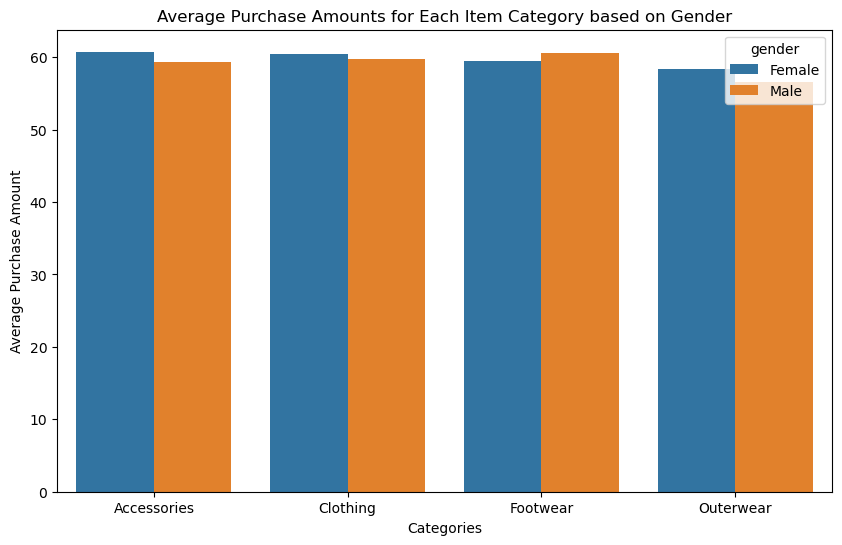

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_avg_purchases, x="category", y="purchase_amount", hue="gender")
plt.title("Average Purchase Amounts for Each Item Category based on Gender")
plt.xlabel("Categories")
plt.ylabel("Average Purchase Amount")

## Geographical Insights: Use a bar chart to visualize the average purchase amounts for different locations.

In [47]:
location_avg = shop_data.groupby('location')['purchase_amount'].mean().sort_values(ascending=False).reset_index()
location_avg

,location,purchase_amount
0,Alaska,67.597222
1,Pennsylvania,66.567568
2,Arizona,66.553846
3,West Virginia,63.876543
4,Nevada,63.379310
5,Washington,63.328767
6,North Dakota,62.891566
7,Virginia,62.883117
8,Utah,62.577465
9,Michigan,62.095890


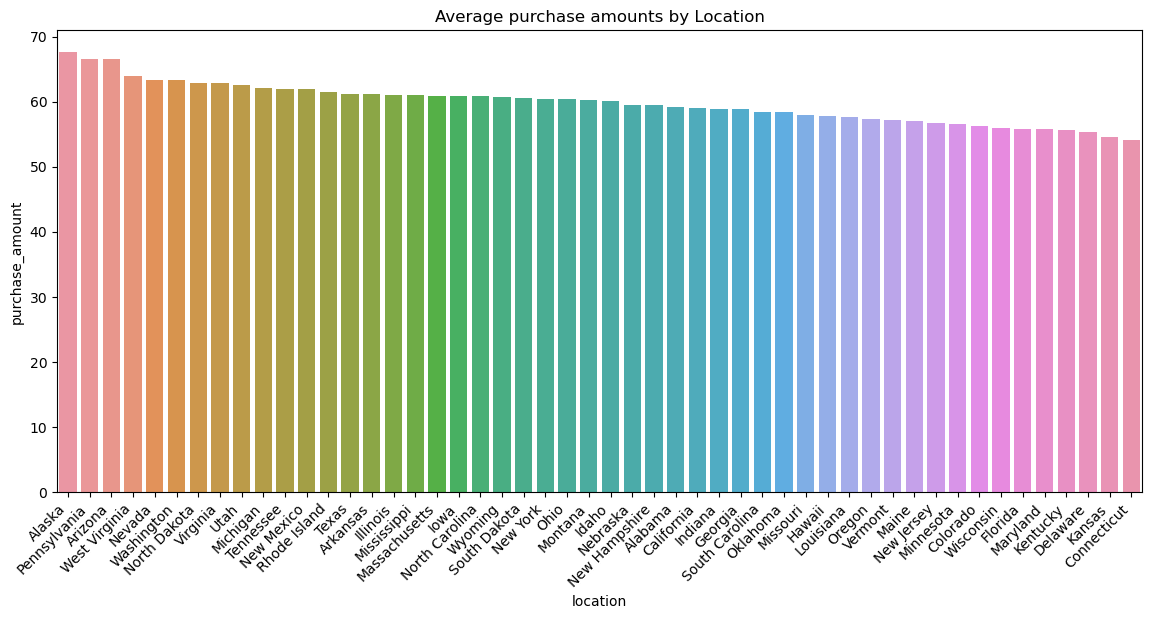

In [48]:
plt.figure(figsize=(14,6))
sns.barplot(data=location_avg, x="location", y="purchase_amount")
plt.title("Average purchase amounts by Location")
plt.xticks(rotation=45, ha='right');

## Payment Method Preferences: Visualize the distribution of payment methods used by customers using a pie chart or bar chart.

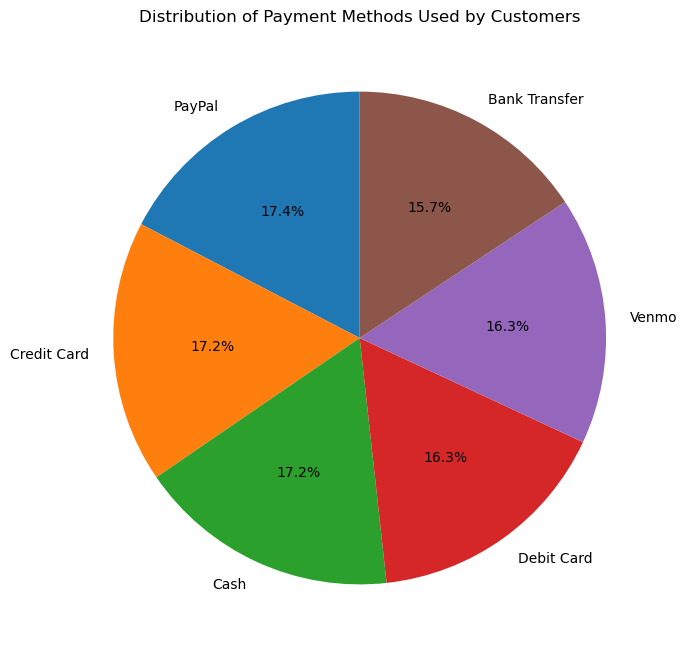

In [49]:
payment_method_distribution = shop_data['payment_method'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_method_distribution, labels=payment_method_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods Used by Customers')

plt.show()

## Loyalty vs. Purchase Frequency: Generate a bar chart to compare the purchase frequency distribution for loyal and non-loyal customers.

In [50]:
cust_loyalty = shop_data.groupby(['loyalty_status', 'purchase_frequency']).size().reset_index(name='count')
cust_loyalty

,loyalty_status,purchase_frequency,count
0,Loyal,Annually,518
1,Loyal,Bi-Weekly,482
2,Loyal,Every 3 Months,518
3,Loyal,Fortnightly,485
4,Loyal,Monthly,495
5,Loyal,Quarterly,503
6,Loyal,Weekly,475
7,Regular,Annually,54
8,Regular,Bi-Weekly,65
9,Regular,Every 3 Months,66


Text(0.5, 1.0, 'Purchase frequency distribution by Loyalty Status')

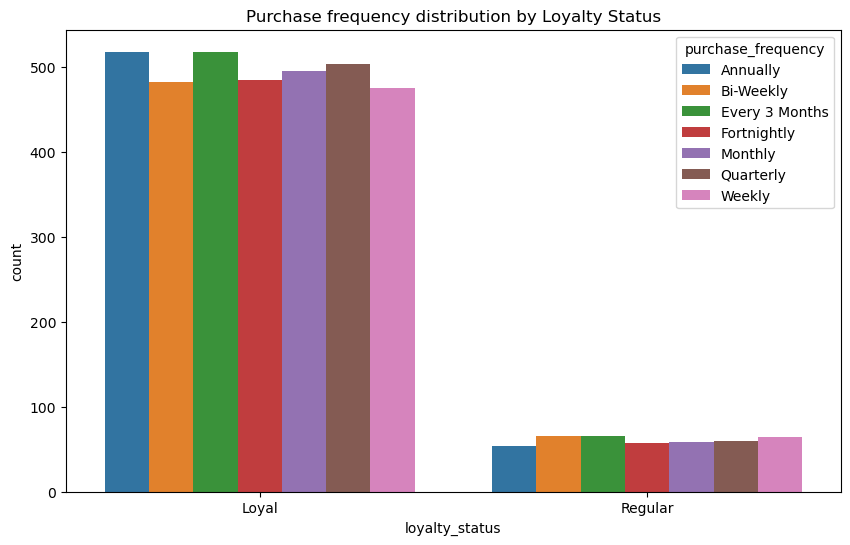

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=cust_loyalty, x="loyalty_status", y="count", hue="purchase_frequency")
plt.title("Purchase frequency distribution by Loyalty Status")

## Shipping Type Influence: Visualize the average purchase amount for different shipping types using a bar chart or boxplot.

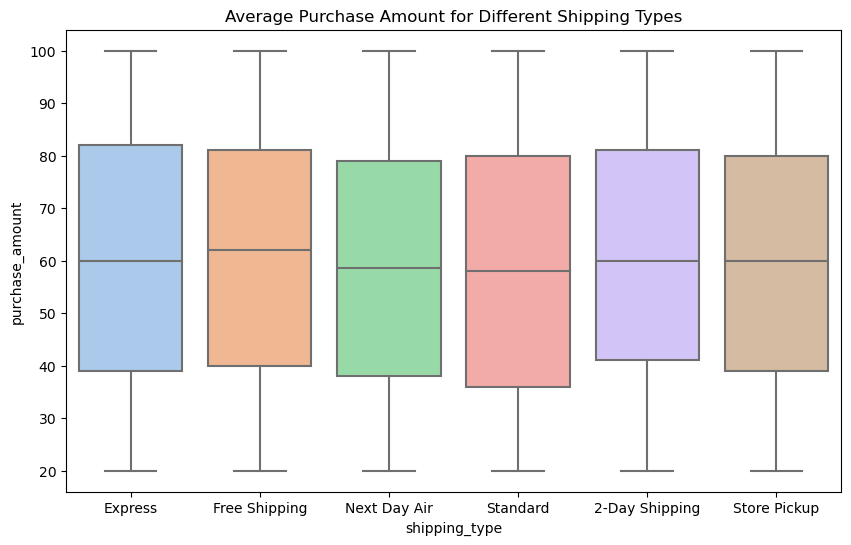

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=shop_data, x="shipping_type", y="purchase_amount", palette="pastel")
plt.title("Average Purchase Amount for Different Shipping Types");

In [53]:
shipping_avg = shop_data.groupby("shipping_type")["purchase_amount"].mean().reset_index()
shipping_avg

,shipping_type,purchase_amount
0,2-Day Shipping,60.733652
1,Express,60.475232
2,Free Shipping,60.410370
3,Next Day Air,58.631173
4,Standard,58.460245
5,Store Pickup,59.893846


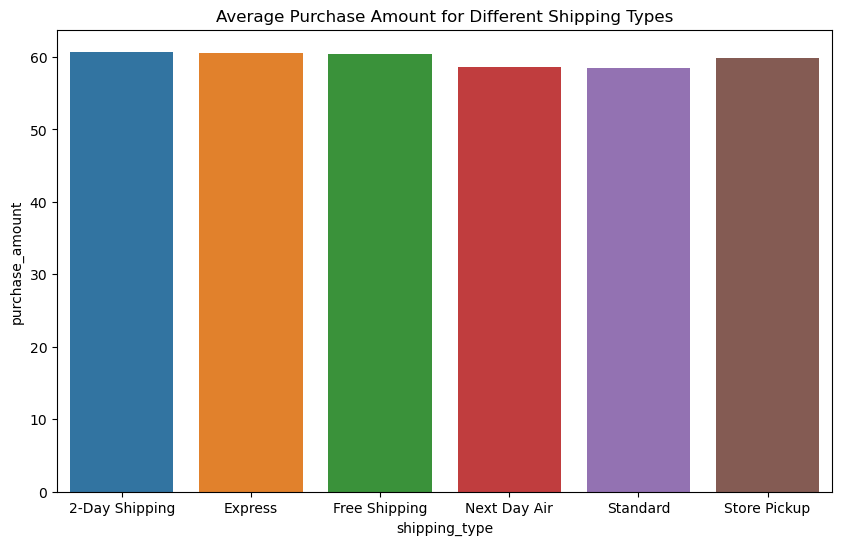

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=shipping_avg, x="shipping_type", y="purchase_amount")
plt.title("Average Purchase Amount for Different Shipping Types");

## Previous Purchases Influence: Plot a scatter plot to explore the relationship between the number of previous purchases and the average purchase amount.

Text(0.5, 1.0, 'Relationship between Previous purchases and Purchase Amounts')

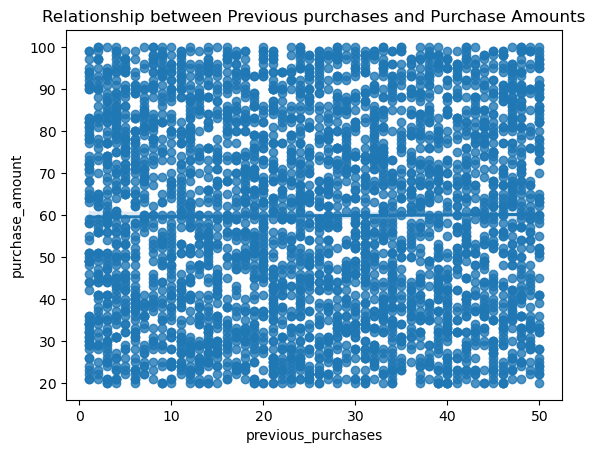

In [55]:
sns.regplot(x=shop_data["previous_purchases"], y=shop_data["purchase_amount"])
plt.title("Relationship between Previous purchases and Purchase Amounts")